# Indexing

Okay guys today's lecture is indexing. 

> What is indexing?

At heart, indexing is the ability to inspect a value inside a object. So basically if we have a list, X, of 100 items and  our index is 'i' then 'i of X' returns the *ith value* inside the list (p.s. we can index strings too).

Okay, so what is the Syntax for this? Glad you asked:

    The Syntax:
    {variable} [{integer}]

So if we wanted to index into something called "a_string" in code it would look something like:

    a_string[integer]

Now, the integer in question cannot be any number from -infinity to +infinity. Rather, it is bounded by the size of the variable. For example, if the size of the variable is 5 that means our integer has to be in the range -5 to 4. Or more generally:

    Index Range :: 
    Lower Bound = -len(variable)
    Upper Bound =  len(variable) - 1 
    Anything outside this range = IndexError
    
Just as a quick explanation, len() is a built-in command that gets the size of the object and adding a "-" sign infront of an integer 'flips' its sign:

In [1]:
# flipping signs of numbers...
a = 5
b = -5
print(-a, -b)

-5 5


In [2]:
# len function
x1 = []
x2 = "12"
x3 = [1,2,3]
print(len(x1), len(x2), len(x3))

x = [1,2,3]
print(x[100]) # <--- IndexError!  100 is waayyy out of bounds

0 2 3


IndexError: list index out of range

Now, those bounds I have just given might sound a bit arbitrary, but actually I can explain exactly how they work. Consider the following picture:

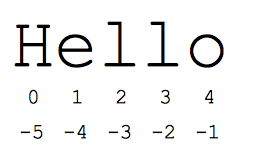

So in this picture we have the string ‘hello’. The two rows of numbers represent the indexes of this string. In Python we start counting from 0 which means the first item in a list/string always has an index of 0. And since we start counting at zero then that means the last item in the list/string is len(item)-1 like so:

In [3]:
string = "hello"
print(string[0])               # first item
print(string[len(string)-1])   # last item

h
o


So that explains the first row of numbers in the image. What about the second row? Well, in Python not only can you index forwards you can also index backwards.

## Readabily counts...

So basically index [0] will always be the start of the list/string and an index of [-1] will always be the end. If you wanted the middle "l" in "hello" have the choice to index at [2] or at [-3]. **And, as a general rule, if code ends up being equivalent your choice should be to go with whatever is more readable.**

> There should be one-- and preferably only one --obvious way to do it. ~ Zen of Python

For example:   

In [ ]:
a_string = "Hello"
# indexing first item...
print(a_string[0])                 # Readable
print(a_string[-len(a_string)])    # Less readable

print(a_string[-1])                # Readable
print(a_string[len(a_string)-1])   # Less readable
print(a_string[4])                 # Avoid this whereever possible! BAD BAD BAD!!

You might wonder what is wrong with index[4] to reference the end of the list. Well this is totally fine if you are iterating through a for-loop or something (more on those later) but if you ever "hard-code" this I have to ask why.

The problem with using index[4] instead of [-1] is that the former way of doing things is considerably less readable. Without actually checking the length of the input the meaning of index[4] is somewhat ambiguous; is this the end? Near the beginning/middle? Meanwhile [-1] **always** refers to the end regardless of input size, and so therefore its meaning is always clear **even when** we don’t know the size of the input.

Index[len(a_string)-1] meanwhile always refers to the end of the list but it is considerably more verbose and less readable than the simple [-1].

## The Index Method

The string class AND the list class both have an index method, and now that we have just covered indexing we are in a position to understand its output.

Basically, we ask if an item is in a string/list. And if it is, the method returns an index for that item. For example:

In [1]:
a_list = ["qwerty", "dave", "magic johnson", "qwerty"]
a_string = "Helllllllo how ya doin fam?"

# notice that Python returns the index of the first match.
print(a_list.index("qwerty"))
print(a_string.index("l"))

# if item is not in the list, you get an value error:
print(a_list.index("chris"))

0
2


ValueError: 'chris' is not in list

## What can we do with indexing?

Obviously we can do a lot with indexing, in the cases of lists, for example, we change the value of the list at position ‘i’. Its simple to do that:

In [4]:
a_list = [1,2,3]
print(a_list)
a_list[-1] = "a"
print(a_list)
a_list[0] = "c"
print(a_list)
a_list[1] = "b"
print(a_list)

# NOTE!! this does NOT work with strings:
a_string = "123"
a_string[0] = "a"   # <-- Error; strings are an "immutable" data type in Python.

[1, 2, 3]
[1, 2, 'a']
['c', 2, 'a']
['c', 'b', 'a']


TypeError: 'str' object does not support item assignment

## Making Grids

> "Flat is better than nested". ~ Zen of Python

Talking of lists, remember that we can go all "inception-like" with lists and shove lists inside lists inside lists. How can we index a beast like that? Well, with difficulty...

In [ ]:
this_is_insane = [ [[[[[[[[[[[[100]]]]]]]]]]]] ]   # WTF !!??

print(this_is_insane[0][0][0][0][0][0][0][0][0][0][0][0][0])

To index a list inside a list the syntax is to add another [{integer}] on the end. Repeat until you get to the required depth. 
    
    The Syntax
    list[{integer}][{integer}]
    
In the case of the above the value 100 was nested inside so many lists that it took a lot of effort to tease it out.  Structures like this are hard to work with, which is why the usual advice is to 'flatten' your lists wherever possible.

With this said, nested structures are not all bad. A really common way of representing a grid in Python is to use nested lists. In which case, we can index any square we want by first indexing the 'row' and then the 'column'. Like so:

    grid[row][column]

If you ever want to build simple board games (chess, connect 4, etc) you might find the representation useful. In code:

In [5]:
grid = [ ["0"] * 5 for _ in range(5) ]  # building a nested list, in style. 'List Comprehensions' are not covered in this course.

print("The Grid looks like this...:", grid[2:], "\n")  
# Note: "grid[2:]" above is a 'slice' (more on slicing below), in this case I'm using slicing to truncate the results,
# observe that three lists get printed, not five. 

def print_grid():
    """This function simply prints grid, row by row."""
    for row in grid: # This is a for-loop, more on these later!
        print(row)

print_grid()
print("\n")
grid[0][0]     = "X" # Top-left corner
grid[0][-1]    = "Y" # Top-right corner
grid[-1][0]    = "W" # Bottom-left corner   
grid[-1][-1]   = "Z" # Bottom-right corner
grid[2][2]     = "A" # Somewhere near the middle
print_grid()

# Quick note, since the corners index are defined by 0 and -1, these numbers should work for all nxn grids. 

The Grid looks like this...: [['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0']] 

['0', '0', '0', '0', '0']
['0', '0', '0', '0', '0']
['0', '0', '0', '0', '0']
['0', '0', '0', '0', '0']
['0', '0', '0', '0', '0']


['X', '0', '0', '0', 'Y']
['0', '0', '0', '0', '0']
['0', '0', 'A', '0', '0']
['0', '0', '0', '0', '0']
['W', '0', '0', '0', 'Z']


Anyway, thats enough about indexing for now, let's move onto the topic of slicing...

## Slicing
 
What is slicing? Well it is a bit like indexing, only instead of returning point 'X' we return all the values between the points (x, y). Just as with indexing, you can slice strings as well as lists.

Note: start points are *inclusive* and endpoints are *exclusive*. 
    
    The Syntax:
    {variable} [{start} : {end} : {step}] 
    * Where start, end and step are all integer values. 
    
It is also worth noting that each of start, end and step are optional arguments, when nothing is given they default to the start of the list, end of the list and the default step is 1.
 
If you give start/step an integer Python will treat that number as an index. Thus, a_list[2:10] says "Hey Python, go fetch me all the values in 'a_list' starting at index 2 up-to **(but not including)** index 10. 
 
Unlike indexing however, if you try to slice outside of range you won't get an error message. If you have a list of length five and try to slice with values 0 and 100 Python will just return the whole list. If you try to slice the list at 100 and 200 an empty list '[]' will be the result. Lets see a few examples:

In [12]:
lst = list(range(1,21)) # list(range) just makes a list of numbers 1 to 20

# The below function just makes it faster for me to type out the test cases below.
def printer(start, end, lst): 
    """ Helper function, takes two integers (start, end) and a list/string.
    Function returns a formated string that contains: start, end and lst[start:end]"""
    if start: 
        if end: 
            sliced = lst[start:end]
        else:
            sliced = lst[start:]
    elif end:
        sliced = lst[:end]
    else:
        sliced = lst[:]
            
    return "slice is '[{}:{}]', which returns: {}".format(start, end, sliced)

print("STARTING LIST IS:", lst)
print("")

# Test cases
print("SLICING LISTS...")
print(printer("","", lst))    # [:] is sometimes called a 'shallow copy' of a list. 
print(printer("", 5, lst ))   # first 5 items.
print(printer(14,"", lst))    # starting at index 14, go to the end.
print(printer(200,500,lst))   # No errors for indexes that should be "out of bounds".
print(printer(5,10, lst))
print(printer(4,5, lst))  
# Negative numbers work too. In the case below we start at the 5th last item and move toward the 2nd to last item.
print(printer(-5,-2, lst))
print(printer(-20,-1, lst))  # note that this list finishes at 19, not 20.

# and for good measure, a few strings:
print("\nSLICING STRINGS...")
a_string = "Hello how are you?"
print(printer("","", a_string)) # The whole string aka a 'shallow copy'
print(printer(0,5, a_string))
print(printer(6,9, a_string))
print(printer(10,13, a_string))
print(printer(14, 17, a_string))
print(printer(17, "", a_string))

STARTING LIST IS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

SLICING LISTS...
slice is '[:]', which returns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
slice is '[:5]', which returns: [1, 2, 3, 4, 5]
slice is '[14:]', which returns: [15, 16, 17, 18, 19, 20]
slice is '[200:500]', which returns: []
slice is '[5:10]', which returns: [6, 7, 8, 9, 10]
slice is '[4:5]', which returns: [5]
slice is '[-5:-2]', which returns: [16, 17, 18]
slice is '[-20:-1]', which returns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

SLICING STRINGS...
slice is '[:]', which returns: Hello how are you?
slice is '[0:5]', which returns: Hello
slice is '[6:9]', which returns: how
slice is '[10:13]', which returns: are
slice is '[14:17]', which returns: you
slice is '[17:]', which returns: ?


Alright, so that's the basics of slicing covered, the only remaining question is what the final "step" argument does. Well basically, the step allows us to 'skip' every *nth *element of the list/string.

For example, suppose that I have (just as before) a list of numbers 1-to-20, but this time I want to return the EVEN numbers between 15 and 19. Intuitively we know that the result should be [16,18] but how can we do this in code?

In [13]:
a_list = list(range(1,21))
sliced_list = a_list[15:19:2]
print(sliced_list)
print(a_list[17])

[16, 18]
18


How does this work? Well, index 15 is the number 16 (remember we count from 0 in Python), and then we skip index 16 (an odd number) and go straight to index 17 (which is the number 18). The next index to look at is 20, but since that is larger than our end step (19) we terminate.

On last thing I'd like to note is that we got even numbers in this case because we started with an even number (index 15= 16). Had we of started with an odd number, this process would have returned odd numbers. For example:

In [15]:
a_list = list(range(0,206))
slice1 = a_list[::10]    # every 10th element starting from zero = [0, 10, 20, ...]
slice2 = a_list[5::10]   # every 10th element starting from 5 = [5, 15, 25,...]

a_string = "a123a123a123a123a123a123a123"  # this pattern has a period of 4. 
slice3 = a_string[::4]  # starts at a, returns aaaaaa
slice4 = a_string[3::4] # starts at 3, returns 333333

print(slice1, slice2, slice3, slice4, sep="\n")

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205]
aaaaaaa
3333333


In both of the above cases we are using a step of size 10. If we start at 0 that means we get:

    10,20,30... 

but if we start at 5 then the sequence we get is

    5, 15, 25...

In the case of the string example above, the patten has a length of four and then repeats. Thus, if we start with n charater and have a step of 4 the resulting pattern with be "nnnnnn".

## Reversing lists with step

The very last thing I want to show you about a the step argument is that if you set step to -1 it will reverse the string/list. 

For example:

In [ ]:
a_list = list(range(1, 11))

print(a_list)
print(a_list[::-1])     # reverses the list
print(a_list[-1:-7:-1]) # last 5 numbers, in reverse order.

## The Range Function

You maybe have observed me use the range function here and elsewhere. This function doesn't have anything to do with indexing or slicing, but I thought I would briefly talk about it here because although the syntax is different this function works in a very similar way to slicing. More specifically, the range function takes 3 arguments; start, end, step (optional). And these arguments work in a similar way to how start, end and step work with regards slicing. Allow me to demonstrate:

In [16]:
list_1 = list(range(1,21))
list_1 = list_1[2::3] 
print(list_1)

# The above 3 lines can be refactored to:
list_2 = list(range(3, 21, 3))
print(list_2)

[3, 6, 9, 12, 15, 18]
[3, 6, 9, 12, 15, 18]


You will note a small difference between the two ways of doing things. When we slice we start the the count at 2 whereas with range we start the count at 3. The difference is the result of the fact the range function is dealing with numbers, whereas the slice is using indexing (e.g. list_1[2] is the number 3).   
And just as with slicing, a step of -1 counts backwards...

In [17]:
list_3 = list(range(10, -1, -1)) # this says: "start at the number 10 and count backwards to 0

# please remember that start points are inclusive BUT endpoints are exclusive, 
# if we want to include 0 in the results we must have an endpoint +1 of our target.
# in this case the number one past zero (when counting backwards) is -1. 

print(list_3)

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
